# Simon Fraser University - Mechatronic Systems Engineering
## Spring 2022 - MSE491 - Application of Machine Learning in Mechatronic Systems
## Instructor: Dr. Mohammad Narimani

## Lab 1 - Regression

#### @Original content author: Amin Kabir - kabir@sfu.ca


In [1]:
# Load General Libraries

import numpy as np
# NumPy is a Python library used for working with arrays.
# It also has functions for working in domain of linear algebra, fourier transform, and matrices.

import pandas as pd
# For data manipulation and analysis.
# data structures and operations for manipulating numerical tables and time series.

import pickle
# for serializing and de-serializing a Python object structure.
# Any object in Python can be pickled so that it can be saved on disk
# Pickling is a way to convert a python object (list, dict, etc.) into a character stream
# which contains all the information necessary to reconstruct the object in another python script.

import matplotlib.pyplot as plt
# data visualization and graphical plotting library 

import seaborn as sns
# a library for making statistical graphics in Python

In [2]:
# load data from Q1
%store -r df F T F_train F_test T_train T_test

### 1 - Model Building

Text(33.0, 0.5, 'Features')

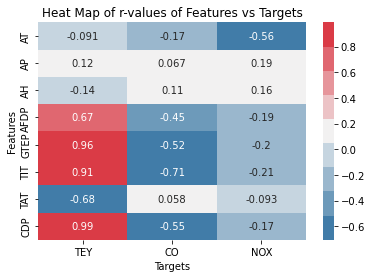

In [5]:
# Heat map for r-values of features vs targets
r = df.corr().iloc[:8, 8:11]

# plt.figure(figsize=(25,10))
sns.heatmap(r,annot=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.title('Heat Map of r-values of Features vs Targets')
plt.xlabel('Targets')
plt.ylabel('Features')

In [6]:
## Model building

## Linear Regression Model 1
# Target: TEY; Feature: CDP (r = 0.99)

## Linear Regression Model 2
# Target: CO; Feature: TIT (r = -0.71)

## Linear Regression Model 3
# Target: NOX; Feature: AT (r = -0.56)

from sklearn.linear_model import LinearRegression

#features that correpsond with targets
T_val = F_train.iloc[:,[7,5,0]]
x_train, y_train, model = [], T_train, []

# Creation of models
for n in range (3):
    x_train.append(T_val.iloc[:,n].values.reshape(-1, 1))
    model.append(LinearRegression().fit(x_train[n], y_train.iloc[:,n]))
    
# ## Linear Regression Model 1
# # Target: TEY; Feature: CDP (r = 0.99)
# x1_train = x_train.iloc[:,7].values.reshape(-1, 1)
# model1 = LinearRegression().fit(x1_train, y_train.iloc[:,0])

# ## Linear Regression Model 2
# # Target: CO; Feature: TIT (r = -0.71)
# x2_train = x_train.iloc[:,5].values.reshape(-1, 1)
# model2 = LinearRegression().fit(x2_train, y_train.iloc[:,1])

# ## Linear Regression Model 3
# # Target: NOX; Feature: AT (r = -0.56)
# x3_train = x_train.iloc[:,0].values.reshape(-1, 1)
# model3 = LinearRegression().fit(x3_train, y_train.iloc[:,2])

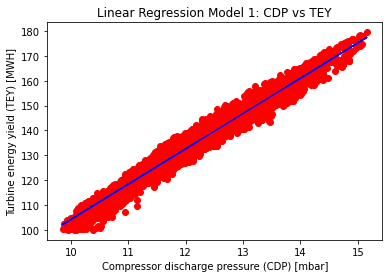

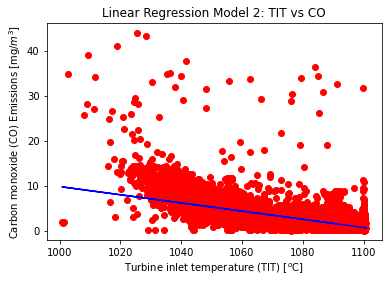

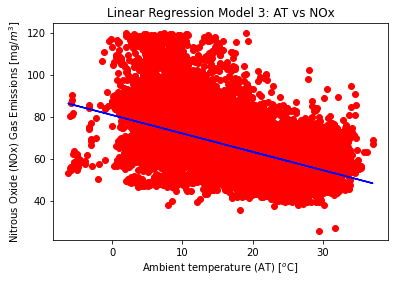

In [8]:
## Visualizing linear regression results
def viz_linear(x_train, y_train, model, title, xlabel, ylabel):
    plt.scatter(x_train, y_train, color='red')
    plt.plot(x_train, model.predict(x_train), color='blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return

# Model 1
plt.figure()
viz_linear(x_train[0], y_train.iloc[:,0], model[0], 'Linear Regression Model 1: CDP vs TEY', 'Compressor discharge pressure (CDP) [mbar]', 'Turbine energy yield (TEY) [MWH]')

# Model 2
plt.figure()
viz_linear(x_train[1], y_train.iloc[:,1], model[1], 'Linear Regression Model 2: TIT vs CO', 'Turbine inlet temperature (TIT) [$^o$C]', 'Carbon monoxide (CO) Emissions [mg/$m^3$]')

# Model 3
plt.figure()
viz_linear(x_train[2], y_train.iloc[:,2], model[2], 'Linear Regression Model 3: AT vs NOx', 'Ambient temperature (AT) [$^o$C]', 'Nitrous Oxide (NOx) Gas Emissions [mg/$m^3$]')

## 2 - Model Evaluation

In [75]:
# Evaluation
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error as MSE

x_test, y_pred, r2, RMSE = ([] for i in range(4))

for n in range(3):
    x_test.append(T_val.iloc[:,n].values.reshape(-1, 1))
    y_pred.append(model[n].predict(x_test[n]).astype('int64'))
    r2.append(r2_score(T_test.iloc[:,n], y_pred[n]))
    RMSE.append(sqrt(MSE(y_test.iloc[:,n], y_pred[n])))
    print('\nModel %i: r-squared = %f, RMSE = %f' %(n+1, r2[n], RMSE[n])

# x1_test = F_test.iloc[:,7].values.reshape(-1, 1)
# y1_pred = model1.predict(x1_test).astype('int64')
# r2_1 = r2(y_test.iloc[:,0], y1_pred)
# RMSE = RMSE(y_test.iloc[:,0], y1_pred)
# print('\nModel 1: r-squared = %f, RMSE = %f' %(r2_1, RMSE1))

# x2_test = F_test.iloc[:,5].values.reshape(-1, 1)
# y2_pred = model2.predict(x2_test).astype('int64')
# r2_2 = r2(y_test.iloc[:,1], y2_pred)
# RMSE = RMSE(y_test.iloc[:,1], y2_pred)
# print('\nModel 1: r-squared = %f, RMSE = %f' %(r2_2, RMSE2))

# x3_test = T_test.iloc[:,0].values.reshape(-1, 1)
# y2_pred = model2.predict(x2_test).astype('int64')
# r2_2 = r2(y_test.iloc[:,1], y2_pred)
# RMSE = RMSE(y_test.iloc[:,1], y2_pred)
# print('\nModel 1: r-squared = %f, RMSE = %f' %(r2_2, RMSE2))

# proportion of the variance for a dependent variable that's explained by an independent variable.



Model 1: r-squared = 0.977256, RMSE = 2.381164


TypeError: 'NoneType' object is not callable

## 3 - Different Data Splits

In [ ]:
from sklearn.model_selection import train_test_split

test_size = [0.5 0.3 0.1] #test size for each model

for n in range(2):
    x_train[n], x_test[n], y_train[n], y4_test[n] = train_test_split(F, T, test_size=test_size[n], random_state=0)
    model[n] = LinearRegression().fit(x_train[n], y_train.iloc[:,n])

def model_eval2( ):
    for n in range(3,6):
        x_test[n] = x_test.values.reshape(-1, 1)
        y_pred[n] = model[n].predict(x_test[n]).astype('int64')
        r2[n] = r2(y_test.iloc[:,n], y_pred[n])
        RMSE[n] = RMSE(y_test.iloc[:,n], y_pred[n])
        print('\nModel %i: r-squared = %f, RMSE = %f' %(n+1, r2[n], RMSE[n]))
    return

## Linear Regression Model 4
# Data split: 50% training, 50% test
x4_train, x4_test, y4_train, y4_test = train_test_split(x, y, test_size=0.5, random_state=0)

## Linear Regression Model 5
# Data split: 70% training, 30% test
x5_train, x5_test, y5_train, y5_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Linear Regression Model 6
# Data split: 90% training, 10% test
x6_train, x6_test, y6_train, y6_test = train_test_split(x, y, test_size=0.1, random_state=0)


In [ ]:
## Barchart of RMSE Values
RMSE = RSME1 + RMSE2 + RMSE3 + RMSE4 + RMSE5 + RMSE6
matplotlib.pyplot.bar